# 3(b)
(c)	Apply harmonic and geometric mean filter on the noisy image and compare their performance with PSNR


###### Akif Islam <br> Department of CSE-RU <br> iamakifislam@gmail.com <br> 19th September 2023

# Load Image & Add Salt-Pepper

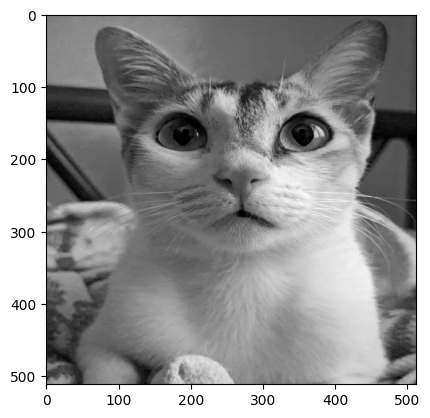

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
img = cv2.cvtColor((cv2.imread("../Resource-Images/Mini.jpg")),cv2.COLOR_BGR2GRAY)
img = cv2.resize(img,(512,512))
original_img = img.copy()

plt.imshow(original_img,cmap='gray')

In [32]:
def make_noisy_image(img, percentage_of_salt_pepper):

    height,width = img.shape

    noisy_img = img.copy()


    total_pixel = height*width
    effected_pixels = round(percentage_of_salt_pepper*total_pixel)
    # print("Total Pixels : ",total_pixel)
    unlucky_pixels = {}
    # print("Effected Pixels:", round(percentage_of_salt_pepper*total_pixel))

    for i in range (effected_pixels):
        # generate two random index
        rand_i = random.randint(0,height-1)
        rand_j = random.randint(0,width-1)

        while(noisy_img[rand_i][rand_j]==255 or noisy_img[rand_i][rand_j]==0):
            rand_i = random.randint(0,height-1)
            rand_j = random.randint(0,width-1)

        # A dictionary to count lucky pixels.
        # Lucky pixels are those who are not effected by salt/pepper
        if (rand_i,rand_j) in unlucky_pixels:
            unlucky_pixels[(rand_i,rand_j)]+=1
        else:
            unlucky_pixels[(rand_i,rand_j)] = 1

        if i%2 == 0:
            noisy_img[rand_i][rand_j] = 255 # Pepper
        else:
            noisy_img[rand_i][rand_j] = 0 # Salt

    # print("Lucky Pixels : ",total_pixel-len(unlucky_pixels))
    return noisy_img

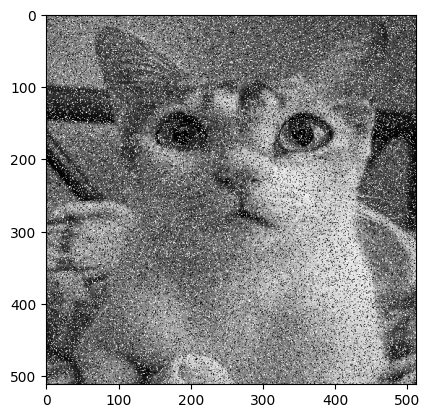

In [33]:
noisy_img = make_noisy_image(img,0.2)
plt.imshow(noisy_img,cmap='gray')

# Harmonic & Geometric Mean Filter

In [34]:
def filter_image(noise_mat,filter_type,mask):

    noise_mat = noise_mat.astype(np.float128)
    noise_mat = noise_mat/255
    
    filtered_harmonic_image = noise_mat.copy()
    filtered_geometric_image = noise_mat.copy()
    
    height,width = noise_mat.shape
    mask_size = mask
    mask_left = mask_size//2
    mask_right = mask_left+1

    filtered_harmonic_image = np.pad(filtered_harmonic_image,mask_left,mode='wrap')
    filtered_geometric_image = np.pad(filtered_geometric_image,mask_left,mode='wrap')
    
    # print("After Padding Shape : ",filtered_image.shape)

    for i in range (mask_left,height+1):
        for j in range(mask_left,width+1):

            mask_area = filtered_harmonic_image[(i-mask_left):(i+mask_right),(j-mask_left):(j+mask_right)]
            
            # Harmonic Mean
            filtered_harmonic_image[i][j] = len(mask_area)/(np.sum(1/mask_area))

            # Geometric Mean
            filtered_geometric_image[i][j] = np.prod(mask_area)**(1/mask_size)

            
    if filter_type=="harmonic":
        return np.array(filtered_harmonic_image[1:height+1,1:width+1])*255
    else:
         return np.array(filtered_geometric_image[1:height+1,1:width+1])*255

In [35]:
x = np.array([1,2,3,4,5,6,7])
1/x

array([1.        , 0.5       , 0.33333333, 0.25      , 0.2       ,
       0.16666667, 0.14285714])

/var/folders/5_/_0y1j83907xb246mlhjdp_xr0000gn/T/ipykernel_64412/3099555504.py:23: RuntimeWarning: divide by zero encountered in divide
  filtered_harmonic_image[i][j] = len(mask_area)/(np.sum(1/mask_area))
/Users/akif/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Casting input data from float128 to float64 for imshow.
  fig.canvas.print_figure(bytes_io, **kw)


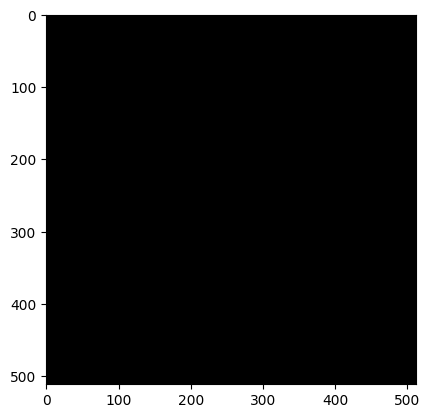

In [36]:
plt.imshow(filter_image(noisy_img,"harmonic",5),cmap='gray')
plt.show()

/var/folders/5_/_0y1j83907xb246mlhjdp_xr0000gn/T/ipykernel_64412/3099555504.py:23: RuntimeWarning: divide by zero encountered in divide
  filtered_harmonic_image[i][j] = len(mask_area)/(np.sum(1/mask_area))


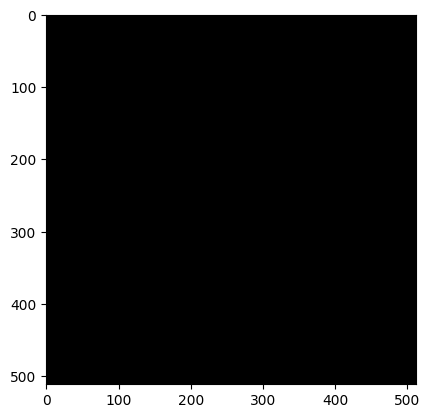

In [37]:
plt.imshow(filter_image(noisy_img,"geometric",5),cmap='gray')
plt.show()